In [49]:
#!pip install pandas plotnine
# use any plotting library seaborn matplotlib,..........
from sklearn.neighbors import NearestNeighbors
from sklearn import datasets
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
from sklearn.preprocessing import StandardScaler
from plotnine import *
import warnings
import sklearn
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

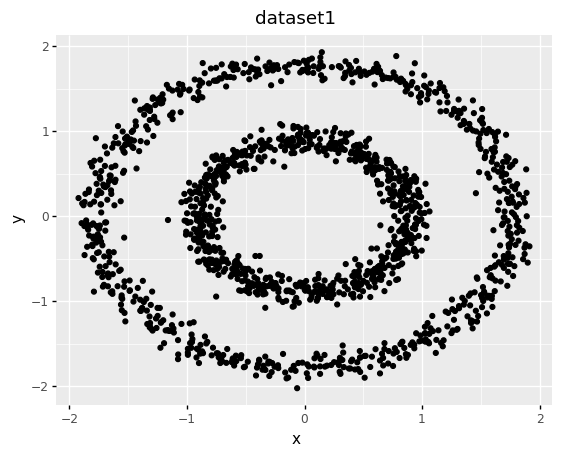

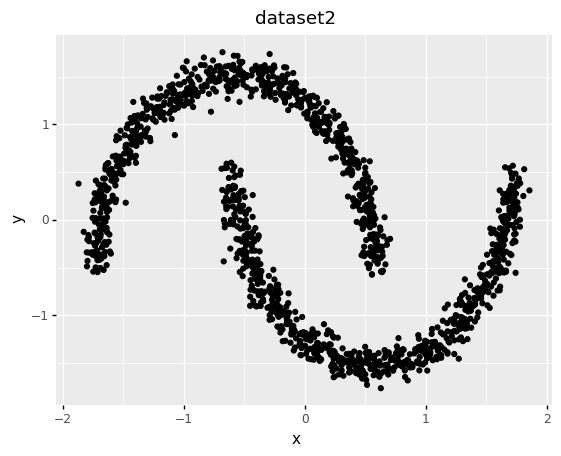

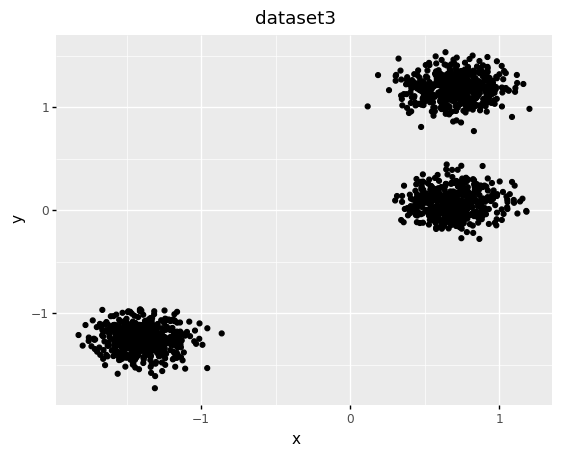

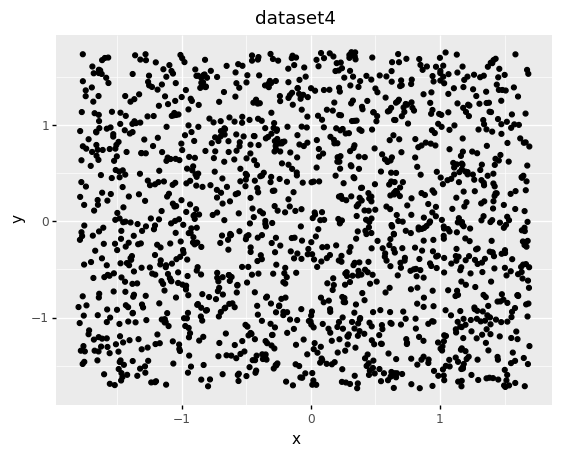

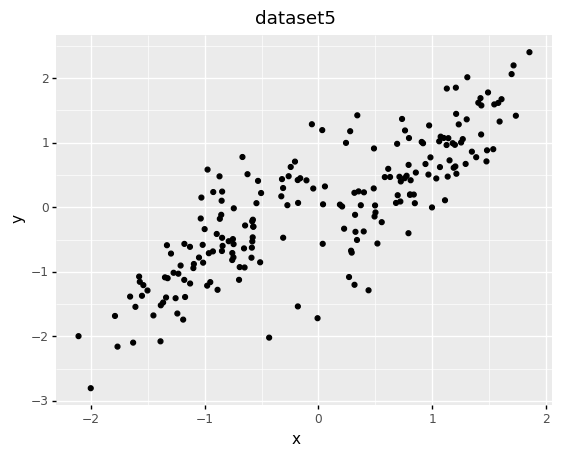

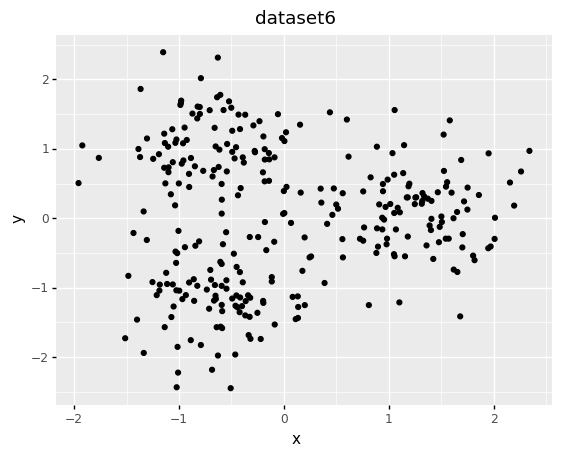

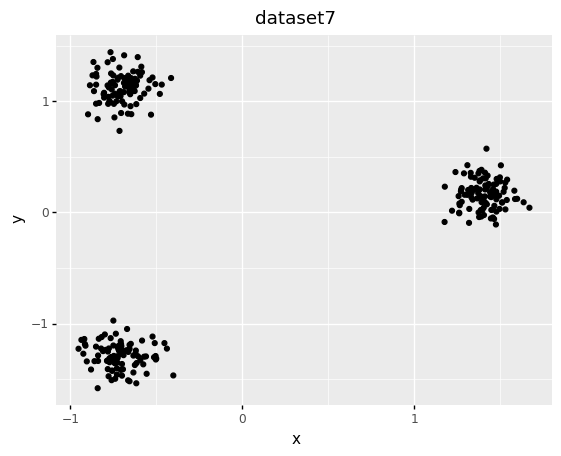

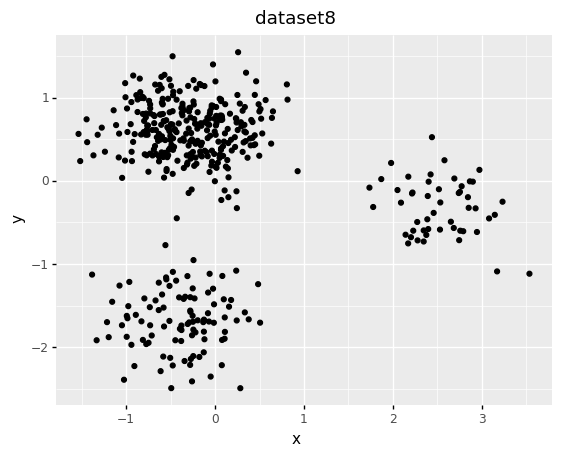

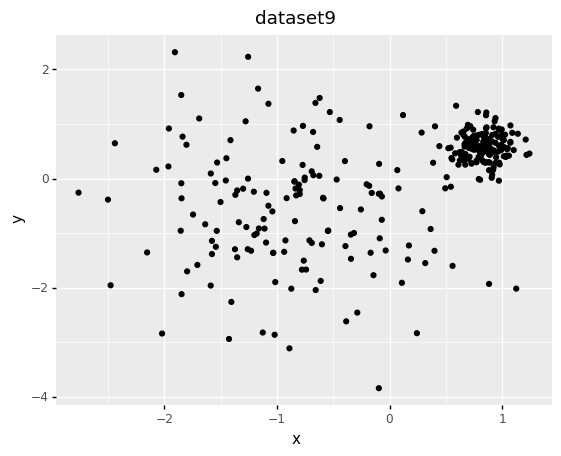

In [55]:
n_samples = 1500

dataset1 = sklearn.datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
dataset1=pd.DataFrame(dataset1[0])

dataset2 = sklearn.datasets.make_moons(n_samples=n_samples, noise=.05)
dataset2=pd.DataFrame(dataset2[0])

dataset3 = sklearn.datasets.make_blobs(n_samples=n_samples, random_state=8)
dataset3=pd.DataFrame(dataset3[0])

dataset4= np.random.rand(n_samples, 2), None
dataset4=pd.DataFrame(dataset4[0])

dataset5= pd.read_csv("data/dataset5.csv", header=None)

dataset6= pd.read_csv("data/dataset6.csv", header=None)

dataset7= pd.read_csv("data/dataset7.csv", header=None)
dataset8= pd.read_csv("data/dataset8.csv")
dataset9= pd.read_csv("data/dataset9.csv")

z = StandardScaler()

for i in range(1,8):
    z = StandardScaler()
    exec(f'dataset{i}[["x","y"]] = z.fit_transform(dataset{i})')
#     print(f'dataset{i}')
    
    exec(f'(ggplot(dataset{i}, aes(x = "x", y = "y")) + geom_point()+ggtitle("dataset{i}")).draw()');
# ggplot(dataset6, aes(x = "x", y = "y")) + geom_point() 
i = 8
# print(f'dataset{i}')
exec(f'(ggplot(dataset{i}, aes(x = "x", y = "y")) + geom_point()+ggtitle("dataset{i}")).draw()');

i = 9
# print(f'dataset{i}')
exec(f'(ggplot(dataset{i}, aes(x = "x", y = "y")) + geom_point()+ggtitle("dataset{i}")).draw()');


In [3]:
for dataset in [dataset1,dataset2,dataset3,dataset4,dataset5,dataset6,dataset7,dataset8,dataset9]:
    print(dataset.columns)

Index([0, 1, 'x', 'y'], dtype='object')
Index([0, 1, 'x', 'y'], dtype='object')
Index([0, 1, 'x', 'y'], dtype='object')
Index([0, 1, 'x', 'y'], dtype='object')
Index([0, 1, 'x', 'y'], dtype='object')
Index([0, 1, 'x', 'y'], dtype='object')
Index([0, 1, 'x', 'y'], dtype='object')
Index(['x', 'y'], dtype='object')
Index(['x', 'y'], dtype='object')


In [51]:
dataset1 = sklearn.datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

In [54]:
type(dataset1)

tuple

1) plot all dataset
2) use standard scalar
3) use K-means, agglomerative, dbscan
4) plot dataset after clustering
5) Evaluate inertia,silhouette score,..........

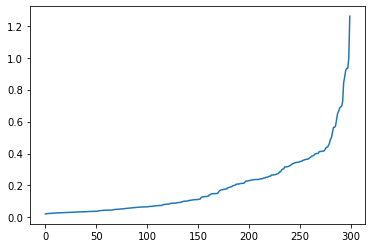

In [4]:
mins = 3
nn = NearestNeighbors(n_neighbors=4)

nn.fit(dataset9[["x", "y"]])

distances, neighbors = nn.kneighbors(dataset9[["x", "y"]])

distances = np.sort(distances[:, mins], axis = 0)
X=list(range(0,len(distances)))
plt.plot(X,distances)


In [5]:
def all3(dataset,n_clusters = 3,eps = 0.3,min_samples=10):
    print("KMeans")
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(dataset)
    sns.scatterplot(dataset.x, dataset.y, c=kmeans.labels_, s=50)
    clustering_labels = kmeans.labels_
    plt.title(f'silhouette_score: {silhouette_score(dataset, clustering_labels)}')
    plt.show()

    print("AgglomerativeClustering")
    aggler = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward').fit(dataset)
    sns.scatterplot(dataset.x, dataset.y, c=aggler.labels_, s=50)
    clustering_labels = aggler.fit_predict(dataset)
    plt.title(f'silhouette_score: {silhouette_score(dataset, clustering_labels)}')
    plt.show()

    print("DBSCAN")
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, ).fit(dataset)
    clustering_labels = dbscan.fit_predict(dataset)
    sns.scatterplot(dataset.x, dataset.y, c=dbscan.labels_, s=50) 
    plt.title(f'silhouette_score: {silhouette_score(dataset, clustering_labels)}')
    plt.show()

for DataSet1

KMeans


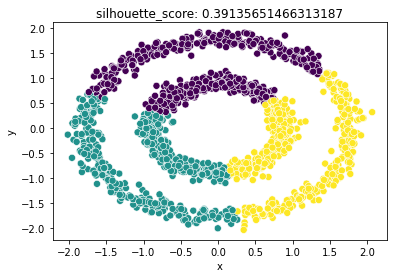

AgglomerativeClustering


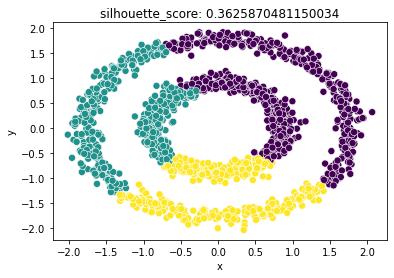

DBSCAN


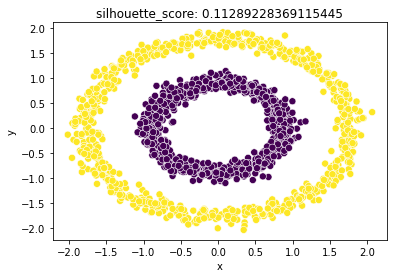

In [6]:
all3(dataset1,3)

for data set 1 it appears that DBscan can cleary get best results with nearly each esp and min samlpe up to 15 
<a id='dataset1'></a>

For DataSet2

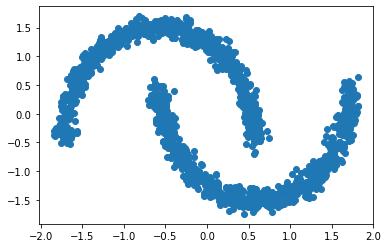

In [7]:
plt.scatter(data = dataset2,x="x",y="y");

KMeans


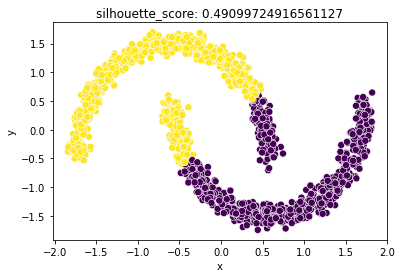

AgglomerativeClustering


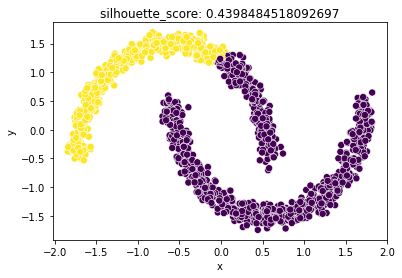

DBSCAN


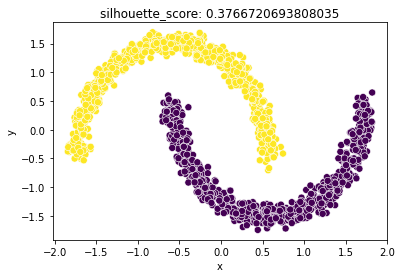

In [8]:
all3(dataset2,2)

KMeans


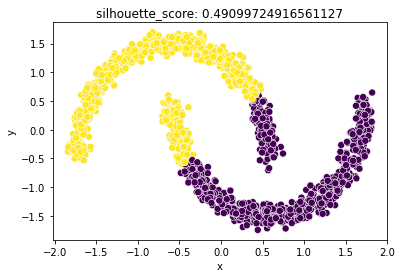

AgglomerativeClustering


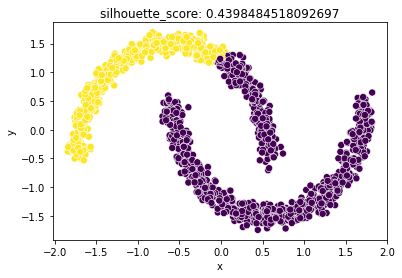

DBSCAN


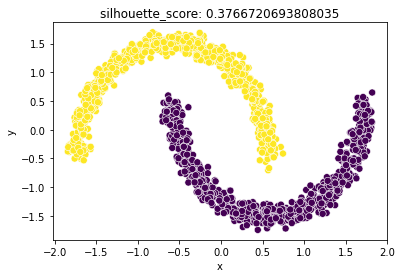

In [9]:
all3(dataset2,2,0.5,2)

for data set 2 it appears that DBscan can cleary get best results with nearly each esp and min samlpe up to 15 also but the other algorihms fail to get it right 
<a id='dataset2'></a>

for dataset 3 

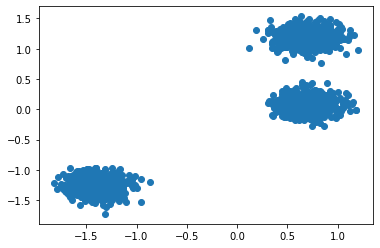

In [10]:
plt.scatter(data = dataset3,x="x",y="y");

KMeans


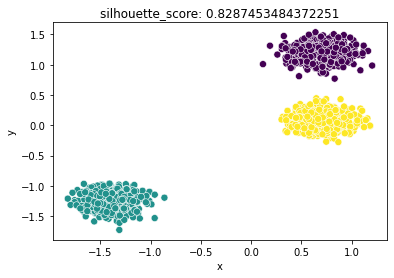

AgglomerativeClustering


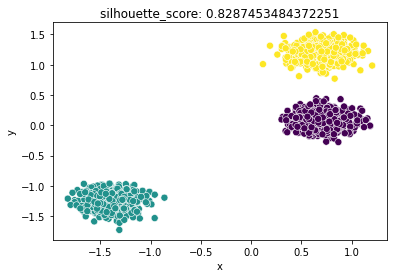

DBSCAN


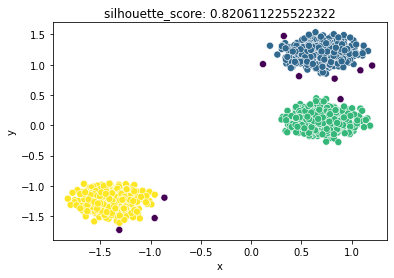

In [11]:
all3(dataset3,3,0.9,15)

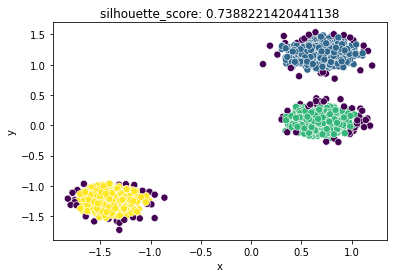

In [32]:
dataset = dataset3
eps =.5
min_samples = 10
dbscan = DBSCAN(eps=eps, min_samples=min_samples, ).fit(dataset)
clustering_labels = dbscan.fit_predict(dataset)
sns.scatterplot(dataset.x, dataset.y, c=dbscan.labels_, s=50) 
plt.title(f'silhouette_score: {silhouette_score(dataset, clustering_labels)}')
plt.show()

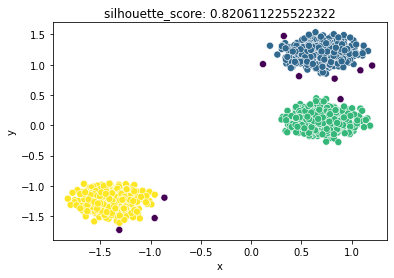

In [33]:
dataset = dataset3
eps =.9
min_samples = 15
dbscan = DBSCAN(eps=eps, min_samples=min_samples, ).fit(dataset)
clustering_labels = dbscan.fit_predict(dataset)
sns.scatterplot(dataset.x, dataset.y, c=dbscan.labels_, s=50) 
plt.title(f'silhouette_score: {silhouette_score(dataset, clustering_labels)}')
plt.show()

after some test to get the best vars for the DBscan i got eps = .9 and min sample = 15 reducuin them make the data cant cluster and it reades alot of them as noise in the edges of the data 

<a id='dataset3'></a>


for dataset4

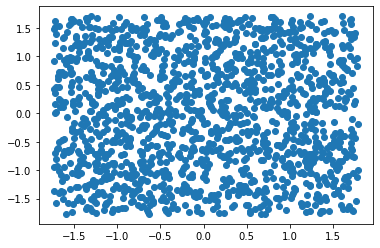

In [13]:
plt.scatter(data = dataset4,x="x",y="y");

KMeans


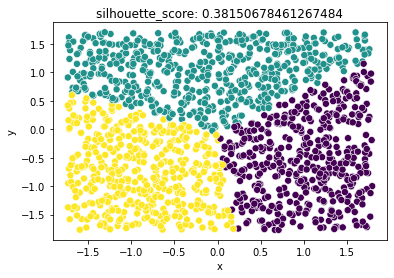

AgglomerativeClustering


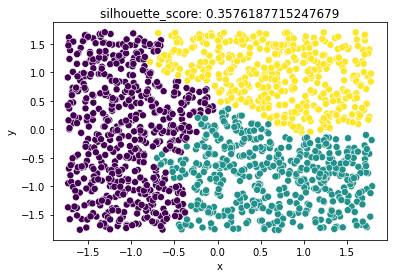

DBSCAN


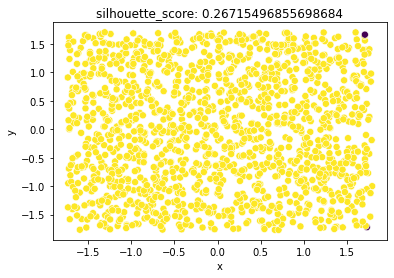

In [14]:
all3(dataset4,n_clusters = 3,eps = 0.3,min_samples=20)

there no algorithms that can help me with that data i can even get it right 

<a id='dataset4'></a>

for dataset5

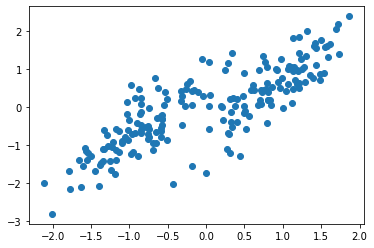

In [15]:
plt.scatter(data = dataset5,x="x",y="y");

KMeans


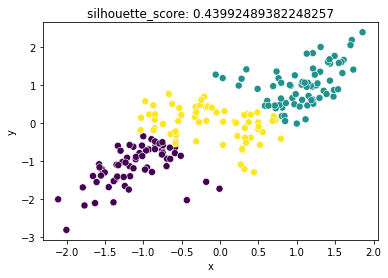

AgglomerativeClustering


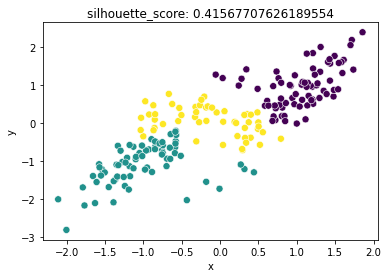

DBSCAN


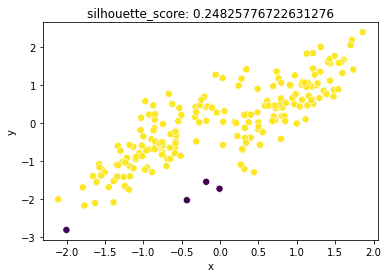

In [16]:
all3(dataset5,n_clusters = 3,eps = 0.9,min_samples=8)

i can see with my eyes 3 cluster and the KMeans AgglomerativeClustering got it right with no effort what so ever yet the DBSCAN cant get it right with all values u tried
<a id='dataset5'></a>

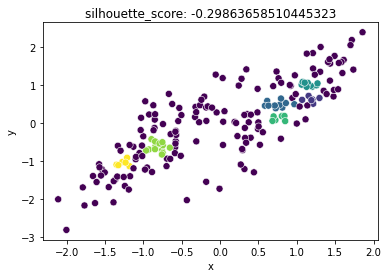

In [17]:
eps =.2
min_samples = 6
dbscan = DBSCAN(eps=eps, min_samples=min_samples, ).fit(dataset5)
clustering_labels = dbscan.fit_predict(dataset5)
sns.scatterplot(dataset5.x, dataset5.y, c=dbscan.labels_, s=50) 
plt.title(f'silhouette_score: {silhouette_score(dataset5, clustering_labels)}')
plt.show()

for dataset6

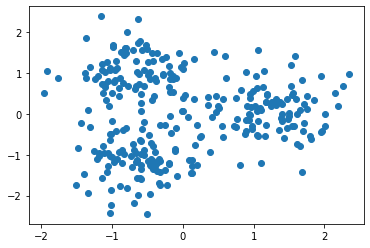

In [18]:
plt.scatter(data = dataset6,x="x",y="y");

KMeans


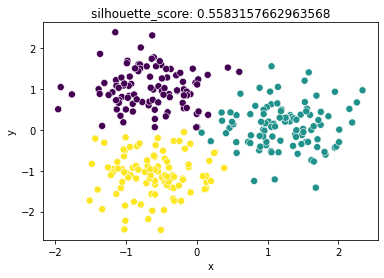

AgglomerativeClustering


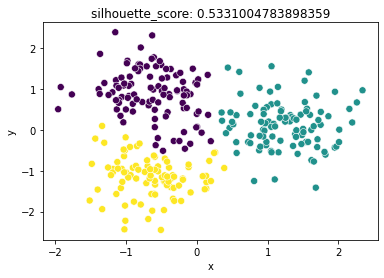

DBSCAN


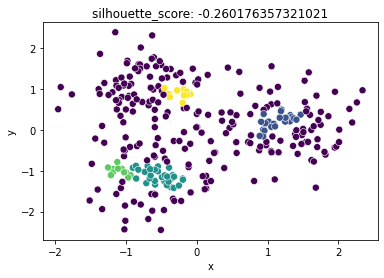

In [19]:
all3(dataset6,n_clusters = 3,eps = 0.3,min_samples=10)

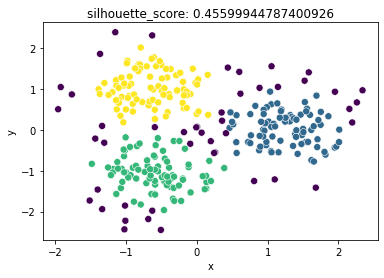

In [48]:
dataset = dataset6
eps =.5
min_samples = 10
dbscan = DBSCAN(eps=eps, min_samples=min_samples, ).fit(dataset)
clustering_labels = dbscan.fit_predict(dataset)
sns.scatterplot(dataset.x, dataset.y, c=dbscan.labels_, s=50) 
plt.title(f'silhouette_score: {silhouette_score(dataset, clustering_labels)}')
plt.show()

i can see with my eyes 3 cluster and the KMeans AgglomerativeClustering got it right with no effort what so ever yet the DBSCAN cant get it right with all values u tried like data set 7 that appeas that the reason why is the data is more seperated than it's needed and that make the model fail but eps with .5 and 10 samples got okesh values
<a id='dataset6'></a>

for dataset7

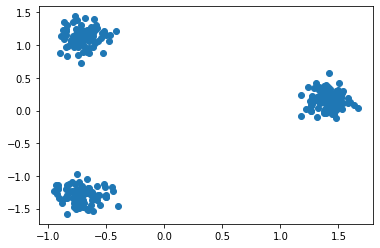

In [21]:
plt.scatter(data = dataset7,x="x",y="y");

KMeans


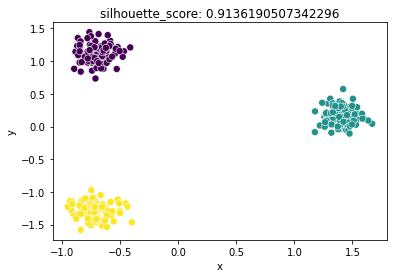

AgglomerativeClustering


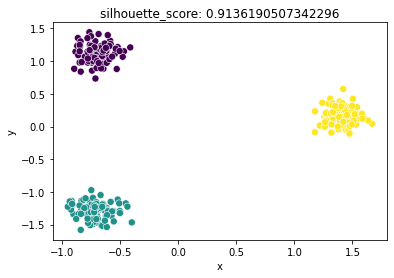

DBSCAN


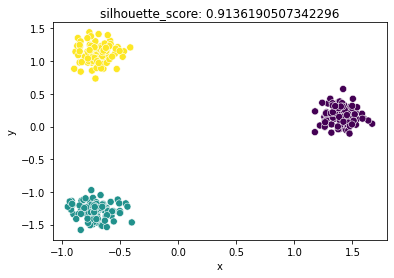

In [22]:
all3(dataset7,n_clusters = 3,eps = 0.3,min_samples=10)

it was easy for the 3 models to get it right with basic values as there is nearly no noise here 

<a id='dataset7'></a>

for dataset8

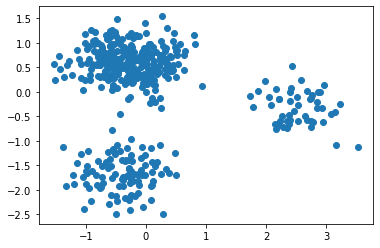

In [23]:
plt.scatter(data = dataset8,x="x",y="y");

KMeans


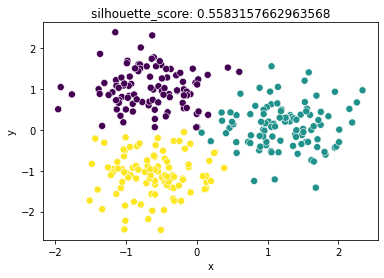

AgglomerativeClustering


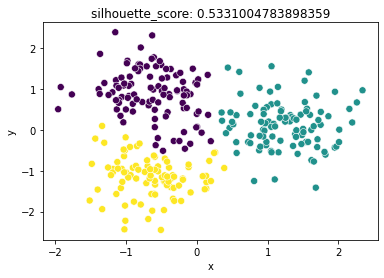

DBSCAN


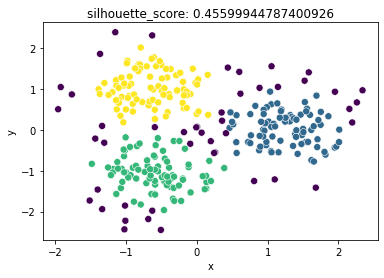

In [24]:
all3(dataset,n_clusters = 3,eps = 0.5,min_samples=10)

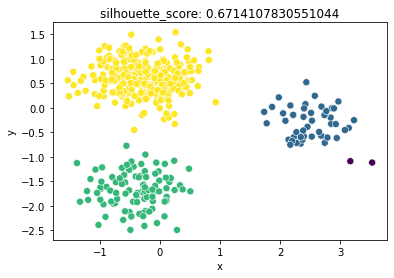

In [25]:
dataset = dataset8
eps =.5
min_samples = 15
dbscan = DBSCAN(eps=eps, min_samples=min_samples, ).fit(dataset)
clustering_labels = dbscan.fit_predict(dataset)
sns.scatterplot(dataset.x, dataset.y, c=dbscan.labels_, s=50) 
plt.title(f'silhouette_score: {silhouette_score(dataset, clustering_labels)}')
plt.show()

for it's seperated agaian i hade to do more work for the DBscan to work and no work needed for the K means

<a id='dataset8'></a>

for dataset9

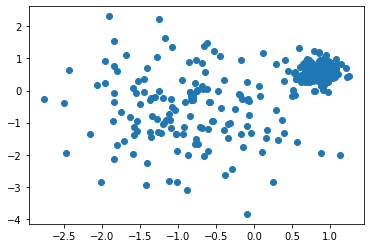

In [26]:
plt.scatter(data = dataset9,x="x",y="y");

KMeans


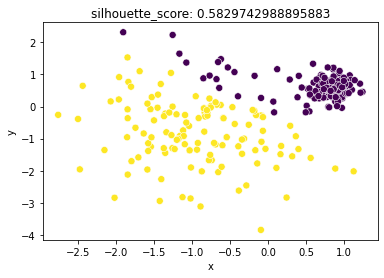

AgglomerativeClustering


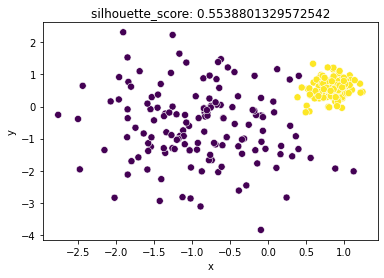

DBSCAN


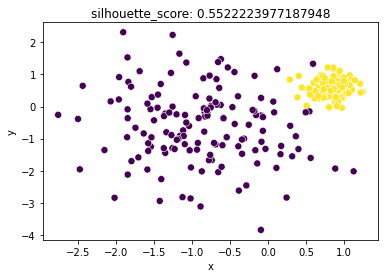

In [27]:
all3(dataset9,n_clusters = 2,eps = 0.3,min_samples=15)

i see that all data are noise and the cluster should be one so i gave the models 2 clusters and gave the DBscan some small eps with some big n
<a id='dataset9'></a>